<h2>Exploratory Data Analysis</h2>

<h3>Problem Statement: </h3>

To perform data analysis of the books sold on Flipkart and generate insights through visualizations.

<h3>Solution: </h3>

First, let's import the required libraries:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick

Now, I'll be importing the flipkart book data which I had earlier cleaned:

In [2]:
df = pd.read_csv('flipkart_books_cleaned.csv')

Let's have a look at our data:

In [3]:
df.head()

,Unnamed: 0,name,rating,number_of_ratings,final_price,original_price,discount,language,bind,author,discount_range
0,0,Ethics (Hindi) - Nitishastra with 1 Disc,4.4,150,449,560,19,Hindi,Paperback,Sunil Agrahari,11-20
1,1,A Naturalist's Guide To The Reptiles Of India,4.3,30,317,499,36,English,Paperback,Das Indraneil,31-40
2,2,Think Like a Monk - Train Your Mind for Peace ...,4.8,807,388,499,22,English,Paperback,Jay Shetty,21-30
3,3,25 Years UPSC IAS/ IPS Prelims Topic-wise Solv...,4.5,16860,271,525,48,English,Paperback,Disha Experts,41-50
4,4,Word Power Made Easy,4.3,808,170,399,57,English,Paperback,Norman Lewis,51-60


Removing the redundant index column in 3..2..1..

In [4]:
df = df.drop(columns = 'Unnamed: 0')
df.head()

,name,rating,number_of_ratings,final_price,original_price,discount,language,bind,author,discount_range
0,Ethics (Hindi) - Nitishastra with 1 Disc,4.4,150,449,560,19,Hindi,Paperback,Sunil Agrahari,11-20
1,A Naturalist's Guide To The Reptiles Of India,4.3,30,317,499,36,English,Paperback,Das Indraneil,31-40
2,Think Like a Monk - Train Your Mind for Peace ...,4.8,807,388,499,22,English,Paperback,Jay Shetty,21-30
3,25 Years UPSC IAS/ IPS Prelims Topic-wise Solv...,4.5,16860,271,525,48,English,Paperback,Disha Experts,41-50
4,Word Power Made Easy,4.3,808,170,399,57,English,Paperback,Norman Lewis,51-60


Now that the data looks ready to be visualized and interpreted, let's get on with it. 

<h4>1. Plotting the relationship between the numerical fields ('Ratings', 'Number of Ratings', 'Final Price', 'Original Price', and 'Discount'):</h4>

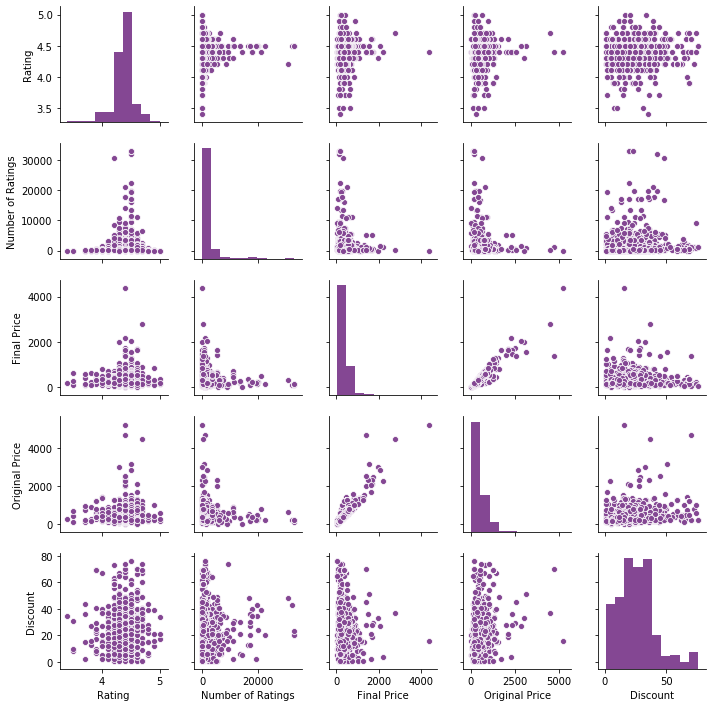

In [5]:
lbl=['Rating','Number of Ratings','Final Price','Original Price','Discount']
sns.set_palette('PRGn')
grid = sns.pairplot(df, height=2)
for i,ax in enumerate(grid.axes.flat): #adding x- and y- labels
    if i >= 20: ax.set_xlabel(xlabel=lbl[i%5]);
    if i%5 == 0: ax.set_ylabel(ylabel=lbl[int(i/5)]);

<h5>Observations:</h5>

1. Most of the Ratings are distributed between 4 and 5.
2. The distribution of number of ratings was hence highest in the range of 4 and 5.
3. The original and final prices are positively correlated as a high original price signifies an increase in the final price.
4. The majority of discounts offered on a book is between 1 and 50 per cent.
5. Only a few books are being sold at discounts higher than 50 per cent.

<h4>2. Plotting the distribution of 'Ratings', 'Number of Ratings', 'Final Price', 'Original Price', and 'Discount':</h4>

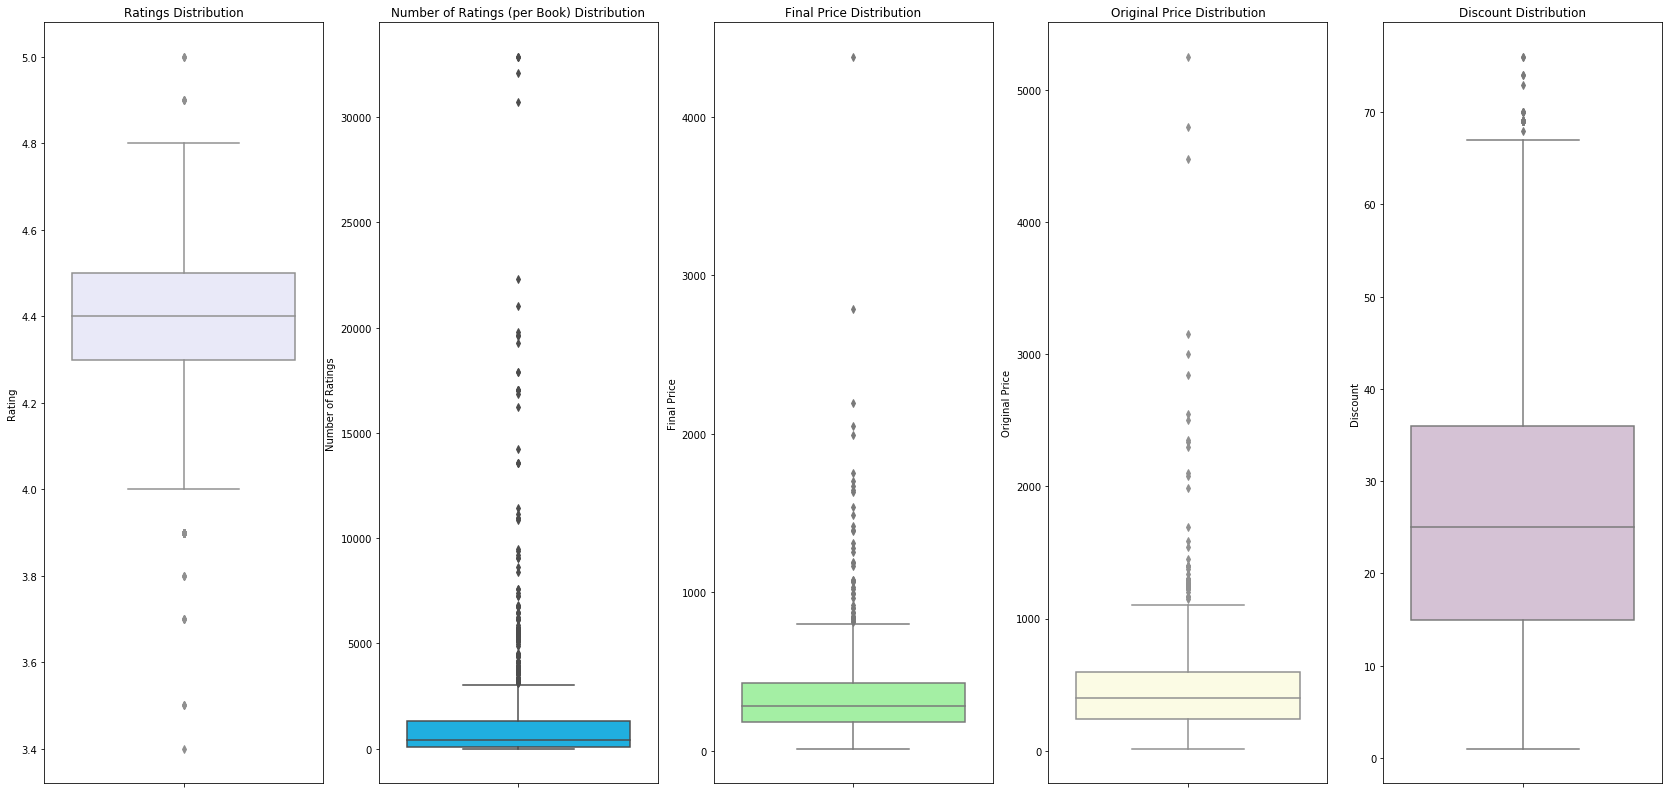

In [6]:
fig,ax = plt.subplots(ncols=5,figsize=(29,14))
x=['rating','number_of_ratings','final_price','original_price','discount']
c=['lavender','deepskyblue','palegreen','lightyellow','thistle']
y=['Rating','Number of Ratings','Final Price','Original Price','Discount']
t=['Ratings Distribution','Number of Ratings (per Book) Distribution','Final Price Distribution','Original Price Distribution','Discount Distribution']
for i in range(0,5):
    sns.boxplot(y=x[i],color=c[i],ax=ax[i],data=df).set(ylabel=y[i], title=t[i])

<h5>Observations:</h5>

1. Rating: Minimum and Maximum ratings are between 4.0 & 4.8 excluding the outliers, with a median of 4.4.
2. Number of Ratings: Number of Ratings for books have a median of 500 (approx.).
3. Final Price: Minimum and Maximum final prices are between Rs. 0 & Rs. 800 (approx.) excluding the outliers, with a median of Rs. 200 (approx.).
4. Original Price: Minimum and Maximum original prices are between Rs. 0 & Rs. 1200 (approx.) excluding the outliers, with a median of Rs. 300 (approx.). Original Prices are higher than Final Price as almost all books are sold at discounted rates.
5. Discount: Highest number of discounts are between 1 and 65 percent with a median of 25 per cent. This means that half the discounts were less than 25 per cent and the other half were greater than 25 per cent.

<h4>3. Plotting the distribution of Ratings based on the categorical data: 'Language','Discount range', and 'Bind'</h4>

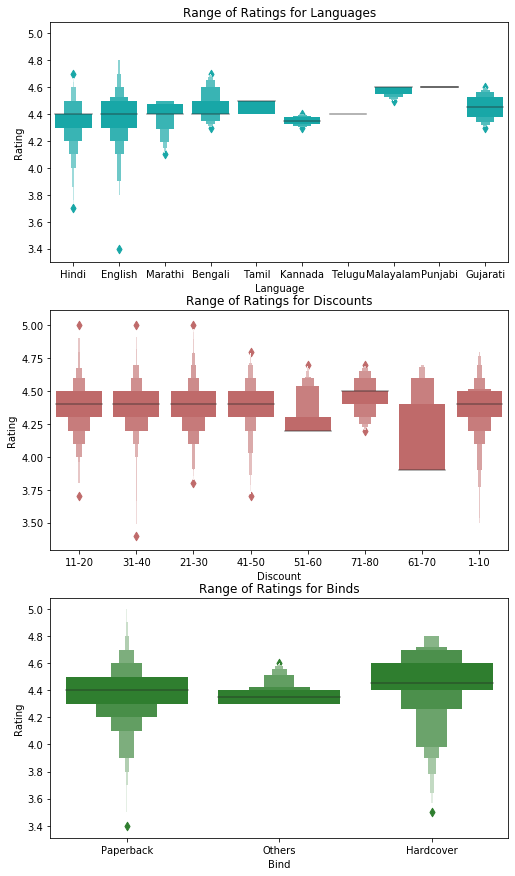

In [7]:
fig,ax = plt.subplots(nrows=3,figsize=(8.2,15))
x=['language','discount_range','bind']
c=['c','indianred','forestgreen']
xl=['Language','Discount','Bind']
t=['Range of Ratings for Languages','Range of Ratings for Discounts','Range of Ratings for Binds']
for i in range(0,3):
    sns.boxenplot(x=x[i],y='rating',color=c[i],ax=ax[i],data=df).set(xlabel = xl[i], ylabel='Rating', title=t[i])

<h5>Observations:</h5>

1. Books which offered higher discounts had reviews in a smaller range as compared to those which offered lower discounts. Customers were more satified with books which offered higher discounts.
2. While the median ratings of Hardcover and paperback books seem similar, the concentration of paperback books with lower reviews is less as compared to hardcover books. We cannot comment on books with other binds because the number of those books is low.

<h4>4. Plotting the books per 'Language', 'Discount Range', and 'Bind' percentage:</h4>

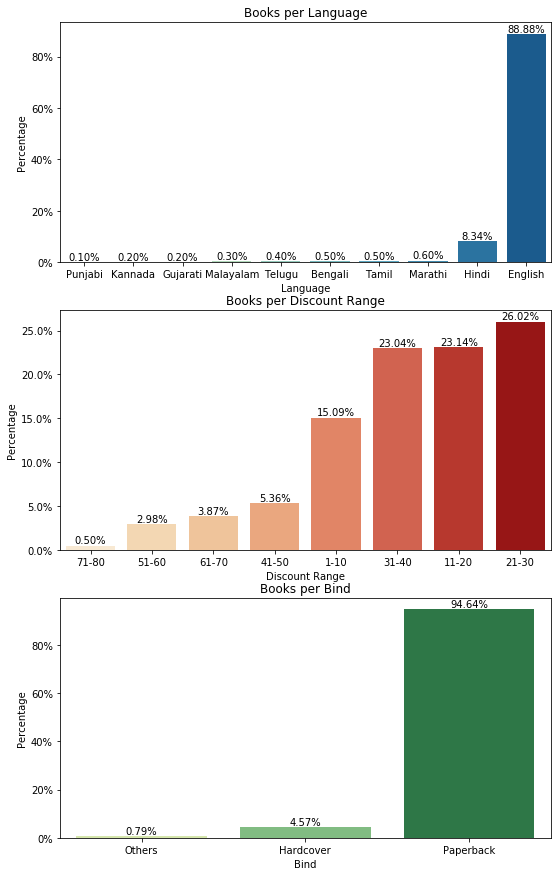

In [8]:
fig,ax = plt.subplots(nrows=3,ncols=1,figsize=(8.8,15))
x_val=['language','discount_range','bind']
pal=['GnBu','OrRd','YlGn']
x_lab=['Language','Discount Range','Bind']
t=['Books per Language','Books per Discount Range','Books per Bind']
for i in range(0,3):
    groupedvalues = df[x[i]].value_counts(normalize=True, sort=True, ascending=True).multiply(other=100).reset_index()
    ax[i]=sns.barplot(data=groupedvalues, x='index' , y=x_val[i], palette=pal[i], ax=ax[i])
    ax[i].set(xlabel = x_lab[i], ylabel='Percentage', title=t[i])
    ax[i].yaxis.set_major_formatter(mtick.PercentFormatter())
    for p in ax[i].patches:
        ax[i].annotate("{:.2f}%".format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', rotation=0, xytext=(0, 5), textcoords='offset points')

<h4>Observations: </h4>

1. English and Hindi books were the highest bought books.
2. Discounts offered on 87% of the books were in the range of 1% to 40%. This shows that flipkart offered discounts above 40% in only 13% of the books (according to the available data).
3. Majority (approx. 95%) of the books were sold in Paperback binding and only a small amount (approx. 5%) were sold in hardcover and other bindings.

<h4>5. Plotting the Average Book Ratings per 'Language', 'Discount Range', and 'Bind':</h4>

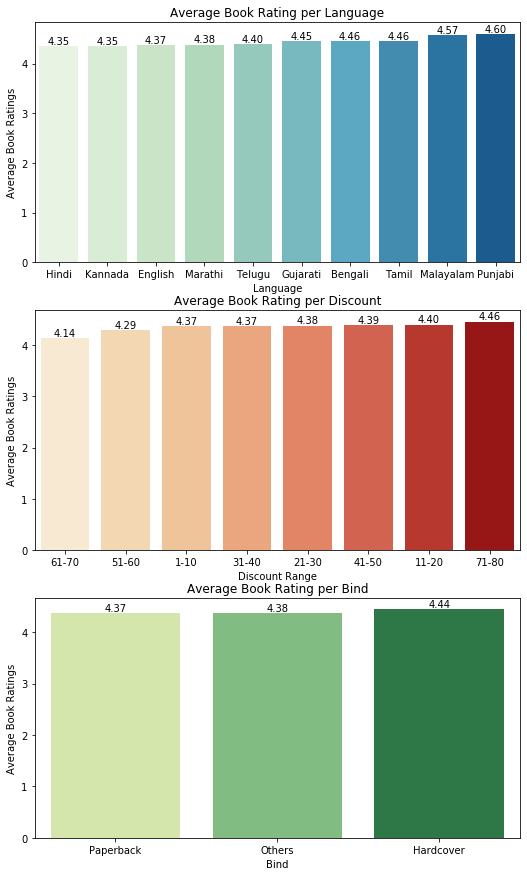

In [9]:
t=['Average Book Rating per Language','Average Book Rating per Discount','Average Book Rating per Bind']
fig,ax = plt.subplots(nrows=3,figsize=(8.7,15))
for i in range(0,3):
    groupedvalues = df.groupby(x_val[i]).mean().reset_index().sort_values(by='rating').reset_index()
    ax[i]=sns.barplot(data=groupedvalues, x=x_val[i], y='rating', palette=pal[i], ax=ax[i])
    ax[i].set(xlabel = x_lab[i], ylabel='Average Book Ratings', title=t[i])
    for p in ax[i].patches:
        ax[i].annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', rotation=0, xytext=(0, 5), textcoords='offset points')

<h5>Observations: </h5>
    
1. While punjabi books were rated the highest, it should also be noted that there's a very small difference in average ratings per language and punjabi books only represent 0.1% of the total books available in the data.
2. Average ratings are highest in the highest discount range of 71-80 which shows that users are more inclined to liking a book (or any othe product) if it is is available at a higher discount.
3. Hardcover books have the highest average ratings. Paperback and other books have similar average ratings. Although, there are 95% Paperback books and only 0.79% other books available in the data. Hence, books with binds other than paperback and hardcover must have had lower ratings if both paperback and other books had the same amount of books in the data.

<h4>6. Plotting the Average Original and Final Prices per 'Language', 'Discount Range', and 'Bind':</h4>

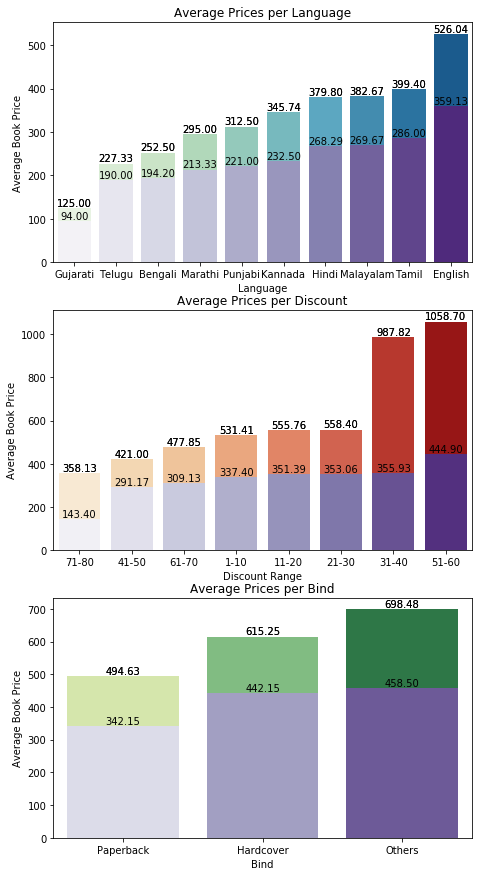

In [10]:
t=['Average Prices per Language','Average Prices per Discount','Average Prices per Bind']
y_val=['original_price','final_price']
fig,ax = plt.subplots(nrows=3,figsize=(7.5,15))
for i in range(0,3):
    for j in range(0,2):
        groupedvalues = df.groupby(x_val[i]).mean().reset_index().sort_values(by=y_val[j]).reset_index()
        ax[i]=sns.barplot(data=groupedvalues, x=x_val[i], y=y_val[j], palette=(pal[i] if j%2==0 else 'Purples'), ax=ax[i])
        ax[i].set(xlabel = x_lab[i], ylabel='Average Book Price', title=t[i])
        for p in ax[i].patches:
            ax[i].annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', rotation=0, xytext=(0, 5), textcoords='offset points')

<h5>Observations: </h5>

1. As observed in an earlier plot, there is a positive correlation between book price (original) and discounted book price (final). As book price inceases, discounted book price also increases.
2. Books in regional languages were cheaper than books in english as observed from their average prices.
3. Higher discounts were offered on low priced books. Average prices were highest in books discounted in the range 51-60%.
4. Average prices of paperback were lower compared to hardcover books.

<h4>6. Plotting the Number of Ratings per 'Language', 'Discount Range', and 'Bind':</h4>

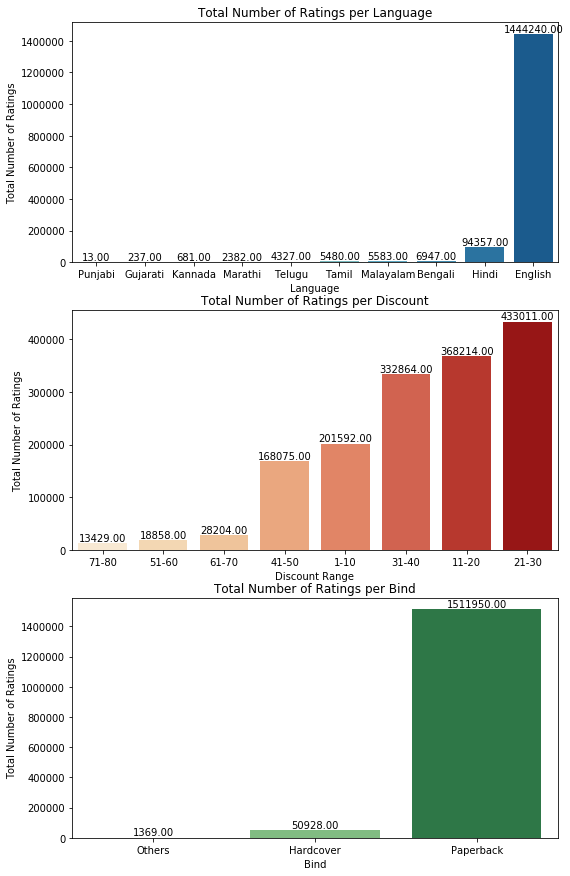

In [11]:
t=['Total Number of Ratings per Language','Total Number of Ratings per Discount','Total Number of Ratings per Bind']
fig,ax = plt.subplots(nrows=3,figsize=(8.7,15))
for i in range(0,3):
    groupedvalues = df.groupby(x_val[i]).sum().reset_index().sort_values(by='number_of_ratings').reset_index()
    ax[i]=sns.barplot(data=groupedvalues, x=x_val[i], y='number_of_ratings', palette=pal[i], ax=ax[i])
    ax[i].set(xlabel = x_lab[i], ylabel='Total Number of Ratings', title=t[i])
    for p in ax[i].patches:
        ax[i].annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', rotation=0, xytext=(0, 5), textcoords='offset points')

<h5>Observations: </h5>

Number of Ratings of a book show its popularity. Books with higher number of ratings must have been more frequently bought than books with lower number of ratings.

1. English books had highest number of rating which shows that they were the most popular and frequently bought as they had highest number of ratings. Among regional languages, hindi books were the most popular seeing that it is one of the most frequently spoken and taught regional languages in the country.
2. Books in the discount range of 1% to 50% had the highest number of reviews. From earlier observations, we can see that  flipkart offered discounts on approx. 92% of the books in this range. This proves why these books have the highest number of ratings. 

<h3>Conclusion: </h3>

Comprehensive Exploratory Data analysis of the books sold on Flipkart was performed and meaningful insights were drawn.